In [1]:
import warnings
import datetime
import itertools
import numpy as np
import scipy as sp
import cvxpy as cp
import pandas as pd
import yfinance as yf
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from functools import reduce
from kit import interval_dict, annualize_returns, annualize_vol, get_yf_ts, get_usd_mcap, gbm

warnings.filterwarnings('ignore')

This notebook examines data for stock market indices for different markets (developed and emerging economies) their performance in the last 5 years and their constituents (where possible with data).

🇪🇺 STOXX 50 is a stock index of companies in Eurozone countries. It is a market weighted index of the 50 stocks from 11 countries, representing some of the largest companies in Europe. The index itself as well as its derivatives (index futures and options) are among some of the most liquid products in Europe and the world. It's price time-series in euros below:

[]

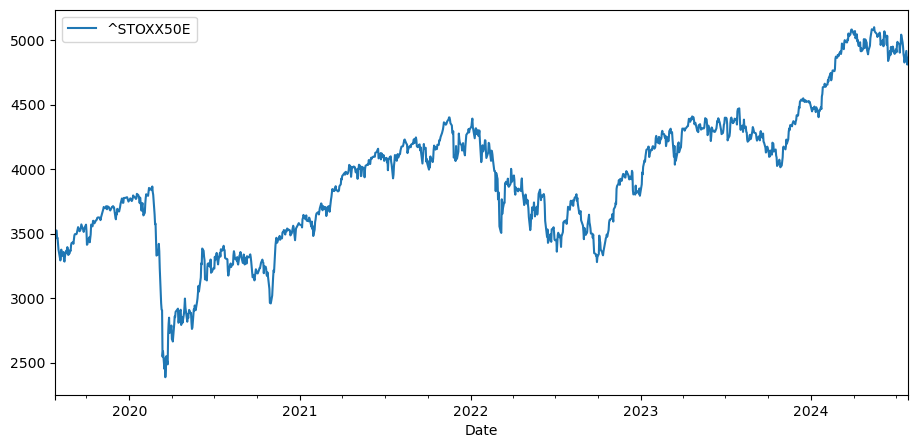

In [31]:
get_yf_ts('^STOXX50E', '5y', '1d').plot(figsize=(11,5))
plt.plot()

Short of data from Yahoo Finance, I am scraping the wikipedia page for its constituents, link for reference below:

In [49]:
stoxx50 = pd.read_html('https://en.wikipedia.org/wiki/EURO_STOXX_50')[4]

In [51]:
stoxx50['MARKET_CAP_USD'] = stoxx50['Ticker'].apply(get_usd_mcap)
stoxx50['WEIGHT'] = stoxx50['MARKET_CAP_USD'] / stoxx50['MARKET_CAP_USD'].sum()

Below we observe the 15 largest constituents of STOXX50 as of today. Note, Yahoo Finance gives the total market cap and has no option for free floating cap (only public investor shares), so there might be some error in the ordering.

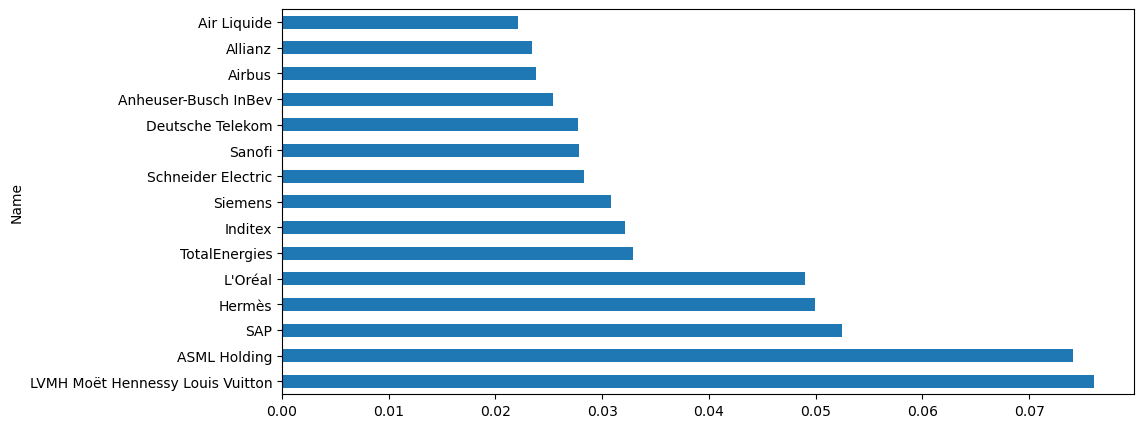

In [65]:
stoxx50.sort_values('WEIGHT', ascending=False).set_index('Name')['WEIGHT'].head(15).plot.barh(figsize=(11,5))
plt.show()